Notebook for adjusting the animation scripts to work for two dimensional outputs from inference and adjusting difference code to work for both Norkyst and for two dimensional outputs

In [2]:
#animation of results
from anemoi.datasets import open_dataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean  
import numpy as np 
import sys
import xarray as xr
import cmocean
import cartopy.crs as ccrs
import cartopy

In [7]:
inference_path = '/lustre/storeB/project/fou/hi/foccus/malene/run-anemoi-ocean/ppi/external_checkpoint_inference/Inference_res/2024-04-02_.ckpt_e010_s020000.nc'

dfi = xr.open_dataset(inference_path)
dfi

<xarray.Dataset> Size: 5GB
Dimensions:            (X: 1148, Y: 2747, time: 17)
Coordinates:
  * X                  (X) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
  * Y                  (Y) float64 22kB 0.0 800.0 ... 2.196e+06 2.197e+06
  * time               (time) datetime64[ns] 136B 2024-04-02 ... 2024-04-04
Data variables: (12/26)
    latitude           (X, Y) float32 13MB ...
    longitude          (X, Y) float32 13MB ...
    h                  (time, X, Y) float32 214MB ...
    salinity_0         (time, X, Y) float32 214MB ...
    sea_mask           (time, X, Y) float32 214MB ...
    temperature_0      (time, X, Y) float32 214MB ...
    ...                 ...
    rain               (time, X, Y) float32 214MB ...
    river_binary_mask  (time, X, Y) float32 214MB ...
    sin_julian_day     (time, X, Y) float32 214MB ...
    sin_latitude       (time, X, Y) float32 214MB ...
    sin_local_time     (time, X, Y) float32 214MB ...
    sin_longitude      (time, X, Y) float32 214MB ...

In [4]:
#Making sure the general equations work for the inference files:
"""
def results_animation(file_path,variable, dir, frame, start_time, **kwargs):
    ds = xr.open_dataset(file_path, engine="netcdf4") #add isel when its relevant to select which s-layer you want to look at (per now it is only the surface layer)
    ds_var = ds[f'{variable}']
    print(f'Dataset imported and variable: {variable} is chosen')
    longitude = ds["X"].values#.flatten()
    latitude = ds["Y"].values#.flatten() 
    print(f'Shape of variable is: {ds_var.shape}')
    print(f'shape of longitude is: {longitude.shape}')
    print(f'shape of latitude is: {latitude.shape}')

    fig,ax = plt.subplots(figsize = (12,8), subplot_kw = {'projection' : ccrs.NorthPolarStereo()})
    sc = ax.pcolormesh(ds_var[0], cmap = cmocean.cm.speed, transform = ccrs.PlateCarree(), **kwargs)
    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = 'black')
    print('Creating a scatterplot is succsessfull')
    cbar = fig.colorbar(sc, ax=ax, orientation = "vertical", label = variable, extend = 'both')
        
    def update(frame):
        print('Made it to the animation loop')
        sc.set_array(ds_var[frame])
        print('Made it to creating the scatter array (ani)')
        ax.set_title(f'Time step: {frame *3} hrs')
        ax.set_xlabel(f'Latitude [$\circ$]')
        ax.set_ylabel(f'Longitude [$\circ$]')
        return sc 
    print('Made it out of the loop')
    ani = FuncAnimation(fig, update, frames=range(frame), interval = 400)
    print('Trying to save it')
    ani.save(f'{dir}/animation_{variable}.gif', writer="imagemagick")
"""


'\ndef results_animation(file_path,variable, dir, frame, start_time, **kwargs):\n    ds = xr.open_dataset(file_path, engine="netcdf4") #add isel when its relevant to select which s-layer you want to look at (per now it is only the surface layer)\n    ds_var = ds[f\'{variable}\']\n    print(f\'Dataset imported and variable: {variable} is chosen\')\n    longitude = ds["X"].values#.flatten()\n    latitude = ds["Y"].values#.flatten() \n    print(f\'Shape of variable is: {ds_var.shape}\')\n    print(f\'shape of longitude is: {longitude.shape}\')\n    print(f\'shape of latitude is: {latitude.shape}\')\n\n    fig,ax = plt.subplots(figsize = (12,8), subplot_kw = {\'projection\' : ccrs.NorthPolarStereo()})\n    sc = ax.pcolormesh(ds_var[0], cmap = cmocean.cm.speed, transform = ccrs.PlateCarree(), **kwargs)\n    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = \'black\')\n    print(\'Creating a scatterplot is succsessfull\')\n    cbar = fig.colorbar(sc, ax=ax, orientation = "vertical

In [5]:
#Trying to run the code
"""
saving_path = '/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/tests_animations'
inference_path = '/lustre/storeB/project/fou/hi/foccus/malene/run-anemoi-ocean/ppi/external_checkpoint_inference/Inference_res/2024-04-02_.ckpt_e010_s020000.nc'
variable_inf = 'v_northward_0'
frames = 16 
start = 0 
results_animation(inference_path, variable_inf, saving_path, frames, start)
"""

"\nsaving_path = '/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/tests_animations'\ninference_path = '/lustre/storeB/project/fou/hi/foccus/malene/run-anemoi-ocean/ppi/external_checkpoint_inference/Inference_res/2024-04-02_.ckpt_e010_s020000.nc'\nvariable_inf = 'v_northward_0'\nframes = 16 \nstart = 0 \nresults_animation(inference_path, variable_inf, saving_path, frames, start)\n"

In [6]:
#Check if the one for absolute val works and maybe rather do it as an if elif inside the first code????
#to save place, but dont do if it takes uncessary time 
"""
def results_absolute_val_animation(file_path, variable1, variable2, dir, frame, start, **kwargs):
    ds = xr.open_dataset(file_path, engine="netcdf4")  #add .isel(s_rho = -1) when expanding to 3D model
    ds_var_1 = ds[f'{variable1}']
    ds_var_2 = ds[f'{variable2}']
    print(f'The following variables are selected: {variable1} and {variable2}')
    abs_val = np.sqrt((ds_var_1 **2) + (ds_var_2**2))
    longitude = ds["X"]
    latitude = ds["Y"]
    fig,ax = plt.subplots(figsize = (12,8), subplot_kw = {'projection' : ccrs.NorthPolarStereo()})
    sc = ax.pcolormesh(abs_val[start], cmap = cmocean.cm.speed, transform = ccrs.PlateCarree(), **kwargs)
    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = 'black')
    cbar = fig.colorbar(sc, ax=ax, orientation = "vertical", label = '$\sqrt{{variable1}²+{variable2}²}$', extend = 'both')


    def update(frame):
        sc.set_array(abs_val[frame])
        ax.set_title(f'Time step: {frame*3} hrs')
        ax.set_xlabel(f'Longitude [$\circ$]')
        ax.set_ylabel(f'Latitude [$\circ$]')
        return sc 
    
    ani = FuncAnimation(fig, update, frames=range(frame), interval = 400)
    ani.save(f'{dir}/animation_abs_val_{variable1}_+_{variable2}.gif', writer="imagemagick")
"""

'\ndef results_absolute_val_animation(file_path, variable1, variable2, dir, frame, start, **kwargs):\n    ds = xr.open_dataset(file_path, engine="netcdf4")  #add .isel(s_rho = -1) when expanding to 3D model\n    ds_var_1 = ds[f\'{variable1}\']\n    ds_var_2 = ds[f\'{variable2}\']\n    print(f\'The following variables are selected: {variable1} and {variable2}\')\n    abs_val = np.sqrt((ds_var_1 **2) + (ds_var_2**2))\n    longitude = ds["X"]\n    latitude = ds["Y"]\n    fig,ax = plt.subplots(figsize = (12,8), subplot_kw = {\'projection\' : ccrs.NorthPolarStereo()})\n    sc = ax.pcolormesh(abs_val[start], cmap = cmocean.cm.speed, transform = ccrs.PlateCarree(), **kwargs)\n    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = \'black\')\n    cbar = fig.colorbar(sc, ax=ax, orientation = "vertical", label = \'$\\sqrt{{variable1}²+{variable2}²}$\', extend = \'both\')\n\n\n    def update(frame):\n        sc.set_array(abs_val[frame])\n        ax.set_title(f\'Time step: {frame*3} hrs\

In [21]:
#Importing norkyst as well
path = '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04'
fname = '/norkyst800-20240402.nc'
dfn = xr.open_dataset(path + fname).isel(s_rho = -1)

In [22]:
dfn

<xarray.Dataset> Size: 28GB
Dimensions:           (time: 24, Y: 1148, X: 2747, s_w: 41)
Coordinates:
  * time              (time) datetime64[ns] 192B 2024-04-02 ... 2024-04-02T23...
    s_rho             float64 8B -0.004904
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
  * s_w               (s_w) float64 328B -1.0 -0.96 -0.9208 ... -0.01 0.0
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 303MB ...
    Vwind_northward   (time, Y, X) float32 303MB ...
    zeta              (time, Y, X) float32 303MB ...
    ubar_eastward     (time, Y, X) float32 303MB ...
    vbar_northward    (time, Y, X) float32 303MB ...
    u_eastward        (time, Y, X) float32 303MB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              float64 8B ...
    Cs_w              (s_w) float64 328B ...
    h                 (Y, X) float32 13MB ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      572391bb-878e-4153-bac1-2bd854d73fe4
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

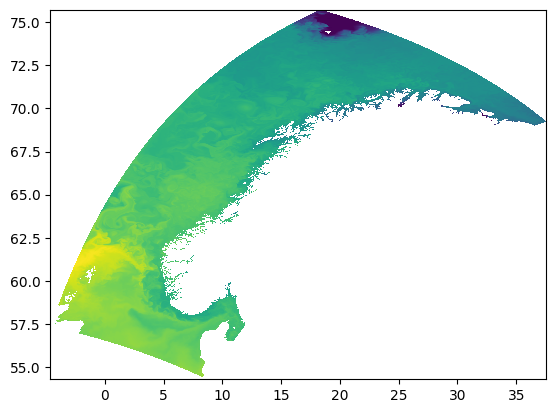

In [31]:
#see how it works to compare temp, salinity, zeta and ocean currents maybe? 
#1. Temperature
temp_i = dfi['temperature_0'].isel(time = 0)
temp_n = dfn['temperature']
plt.pcolormesh(temp_n.lon, temp_n.lat, temp_n.values[0,:,:])

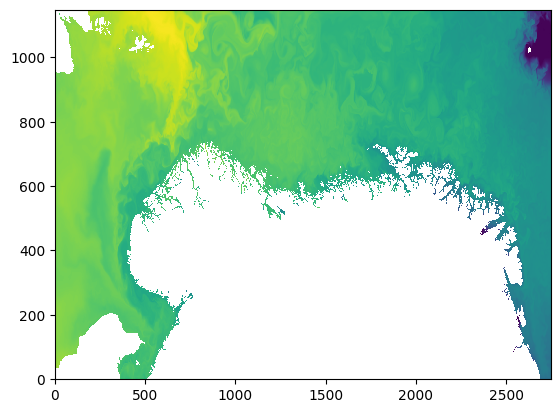

In [35]:
plt.pcolormesh(temp_i)

In [ ]:
#To calculate the differences between the two datasets (Norkyst and Inference, I will have to regrid the data)
from cdo import Cdo 
cdo = Cdo() 
#Trying to use the cdo for the nearest neighbour mapping - first identidying the target grid which is the
#lon and lat of the Norkyst files, giving the inference file and creating a new ouput. Ideal as it does not change
#the original inference results 
#Cdo().remapbil(dfn, input = dfi, output = 'new_inf.nc')

"""
I tried finding a way to download the package for cdo correctly.
Did not work. Got this message: 

(.venv) (base) bash-4.4$ sudo apt-get update

We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for makar5578: 
makar5578 is not in the sudoers file.  This incident will be reported.

heh.. 
"""

FileNotFoundError: [Errno 2] No such file or directory: 'cdo'